In [1]:
# Import Libraries and Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns  

In [2]:
# Bring in my dataset

diabetes = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetes.csv')

In [3]:
# And examine the dataset 

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
## create correlation matrix with coefficients

In [6]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(diabetes[cols].iloc[:,range(0,len(cols))].values)


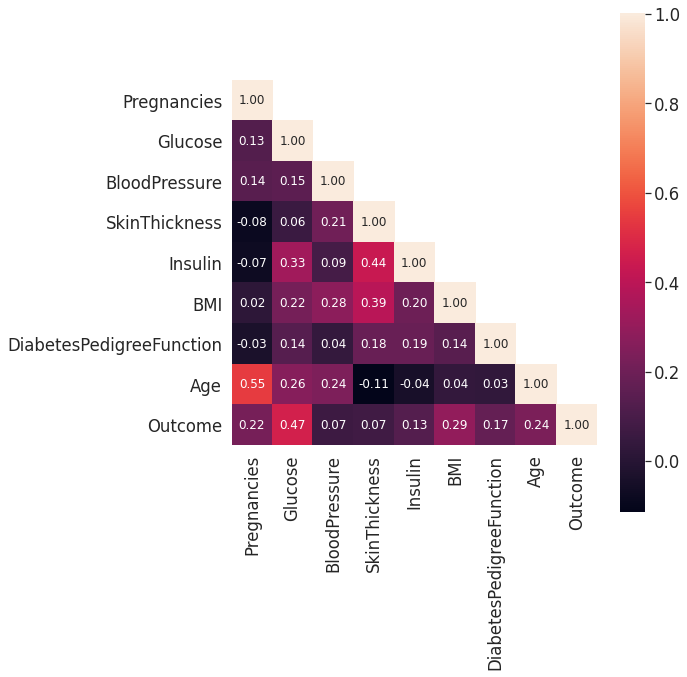

In [7]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)

#mask to eliminate flipped data
mask = np.zeros_like(cov_mat)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, 0.0)

with sns.axes_style("white"):
    hm = sns.heatmap(cov_mat,
                     mask=mask,
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     annot_kws={'size': 12},
                     yticklabels=cols,
                     xticklabels=cols)
plt.tight_layout()
plt.show()

In [21]:
# select features with coeff > 0.20 + Blood Pressure
cols_selected = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure']#, 'DiabetesPedigreeFunction']

In [22]:
## split the data (train - test)
from sklearn.model_selection import train_test_split

X = diabetes[cols_selected].iloc[:,0:6].values     
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [23]:
## Normalize inputs ##

means= np.mean(X_train, axis=0)
stds= np.std(X_train, axis=0)

# check values
print(means)
print(stds)

X_train= (X_train - means)/stds
X_test= (X_test - means)/stds

print(X_train.shape)
print(X_test.shape)

[120.89576547  32.20667752  33.59446254   3.87459283  69.22638436]
[31.78381087  7.90782841 12.00637868  3.44083157 19.53496542]
(614, 5)
(154, 5)


In [24]:
#############################################
## PRINCIPAL BINARY CLASSIFICATION ALGORITHMS
#############################################
## 1. Logistic Regression
## 2. KNearest Neighbors
## 3. Decision Trees
## 4. Support Vector Machine (SVM)
#############################################

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import ensemble

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [26]:
# 1. define classifiers 

classifiers = {
    'Logistic Regression': LogisticRegression(),
    
    'KNearest Neighbors': KNeighborsClassifier(),    
    
    'Decision Trees': DecisionTreeClassifier(min_samples_leaf=6, max_depth=5),
    
    'Support Vector Machine (SVM)': svm.SVC(kernel='linear', C=0.01), #kernel='sigmoid','rbf') #kernel='linear', C=0.01
    
    'Gradient Boosting': ensemble.GradientBoostingRegressor(n_estimators= 500,
          max_depth= 4,
          min_samples_split= 5,
          learning_rate= 0.01,
          loss= 'ls')
}

In [27]:
results=dict()

Logistic Regression: Errors= 28
Accuracy Score= 
0.8181818181818182
Confussion  Matrix: 
[[98 19]
 [ 9 28]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       117
           1       0.60      0.76      0.67        37

    accuracy                           0.82       154
   macro avg       0.76      0.80      0.77       154
weighted avg       0.84      0.82      0.82       154

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Acc Model Logistic Regression= 81.82 %
-------------------------------------------------------------
KNearest Neighbors: Errors= 29
Accuracy Score= 
0.8116883116883117
Confussion  Matrix: 
[[94 16]
 [13 31]]
Classi

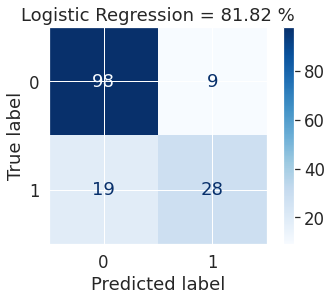

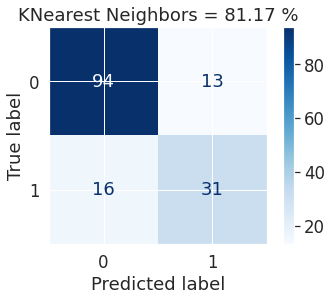

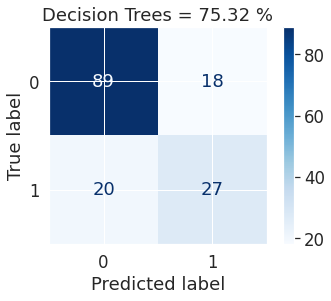

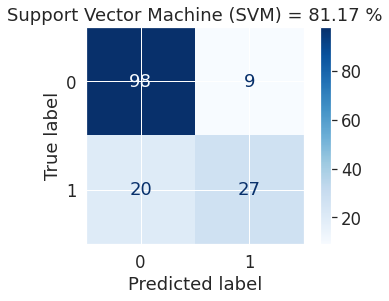

In [28]:
# 2. Train model and make predictions

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag the outliers
    if clf_name == 'Logistic Regression':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'KNearest Neighbors':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Decision Trees':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Support Vector Machine (SVM)':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Gradient Boosting':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    #calculate number of errors
    n_errors = (y_pred != y_test).sum()
    
    #run classification metrics
    print(f'{clf_name}: Errors= {n_errors}')
    print('Accuracy Score= ')
    print(clf.score(X_test, y_test))
    # save results
    results[clf_name]= round(clf.score(X_test, y_test)*100, 2)
    if clf_name == 'Gradient Boosting':
        continue
    else:
        print('Confussion  Matrix: ')
        print(confusion_matrix(y_pred, y_test))
        print('Classification Report: ')
        print(classification_report(y_pred, y_test))
    
    print(classification_report(y_test, y_pred))
    
    # plot confusion matrix -(redicted labels and true labels)
    plot = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plot.ax_.set_title(clf_name + f' = { round(clf.score(X_test, y_test)*100, 2)} %')
    
    print(f"Acc Model {clf_name}= {round(clf.score(X_test, y_test)*100, 2)} %")
    
    print('-------------------------------------------------------------')

In [29]:
# Resume Model and Accuracy Porcentaje results
results

{'Logistic Regression': 81.82,
 'KNearest Neighbors': 81.17,
 'Decision Trees': 75.32,
 'Support Vector Machine (SVM)': 81.17,
 'Gradient Boosting': 32.65}

Text(0.5, 0, 'Importance')

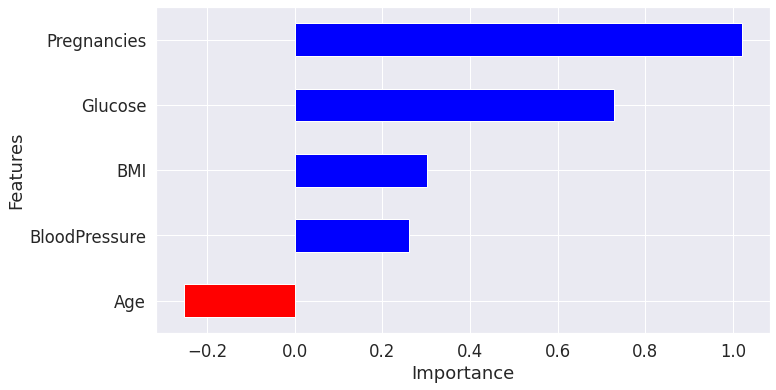

In [30]:
# Show importance of each features variable used in the Logistic Rregression Model created

log_reg = LogisticRegression(C=1e5)
log_reg.fit(X_train, y_train)
y_pred = clf.predict(X_test)

coeff = list(log_reg.coef_[0])
labels = list(diabetes.drop(['Outcome', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [31]:
####################
## Saving the model 
####################
import sklearn.externals
import joblib

joblib.dump([log_reg, means, stds], 'diab_log_reg_model_5features.pkl')

['diab_log_reg_model_5features.pkl']

In [32]:
####################
## Load the model 
####################
# calculate accurancy score (should be the same)

log_reg_model, means, stds = joblib.load('diab_log_reg_model_5features.pkl')
acc_model = log_reg_model.score(X_test, y_test)
print(f"acc model loaded= {round(acc_model*100, 2)} %")

acc model loaded= 81.82 %


In [33]:
#####################################
## Make Prediction with loaded model
#####################################
# if sample is not normalizalized (sample-means) / stds
X_value = X_test[:1]
X_value

array([[ 2.45735903,  1.35224513, -0.96569189, -0.8354355 ,  0.34674316]])

In [36]:
pred = log_reg_model.predict(X_value)
pred

array([1])

In [37]:
print(pred)
print(y_test[:1].values)

[1]
[1]


In [38]:
pred == y_test[:1]

661    True
Name: Outcome, dtype: bool

In [39]:
## test prediction model with a set sample
sample_set = X_test[:23]
sample_set.shape

(23, 5)

In [40]:
# make a prediction with the set defined
pred_set = log_reg_model.predict(sample_set)
pred_set

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0])

In [41]:
# Check the accuracy for the set
acc_model_set = log_reg_model.score(X_test[:23], y_test[:23])
print(f"acc model set= {acc_model_set*100} %")

acc model set= 95.65217391304348 %
